## Анализ мобильного приложения

### Задача и цель
Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 
Нужно разобраться, как ведут себя пользователи мобильного приложения. 
Изучить воронку продаж. Узнайть, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
После этого исследуйте результаты A/A/B-эксперимента

### План
#### - Изучить общую информацию
#### - Подготовить данные
#### - Изучить и проверить данные
#### - Изучить воронку событий
#### - Изучить результаты эксперимента

Импортирую библиотеки:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
from matplotlib.pyplot import figure
import seaborn as sns
import math as mth
from scipy import stats as st
from collections import defaultdict


### Шаг 1.
Открыть файл с данными и изучить общую информацию

In [2]:
data = pd.read_csv('/Users/marksuskov/ЯП/logs_exp.csv',sep='\t')
display(data)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


### Шаг 2. 
- Подготовьте данные
- Замените названия столбцов на удобные для вас;
- Проверьте пропуски и типы данных. Откорректируйте, если нужно;
- Добавьте столбец даты и времени, а также отдельный столбец дат;

In [3]:
#заменю название столбцов
data.columns = data.columns = ['eventname', 'userId', 'datetime', 'expid']
data


,eventname,userId,datetime,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [4]:
#проверю пропуски и дубликаты
display('Дубликатов:',data.duplicated().sum())
display('Пропусков:',data.isnull().sum().sum())

'Дубликатов:'

413

'Пропусков:'

0

Было выявлено 413 дубликатов, удалю их

In [5]:
data = data.drop_duplicates() 
display('Дубликатов:',data.duplicated().sum())

'Дубликатов:'

0

дубликаты были удалены

In [6]:
#Проверю типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   eventname  243713 non-null  object
 1   userId     243713 non-null  int64 
 2   datetime   243713 non-null  int64 
 3   expid      243713 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


In [7]:
pd.options.mode.chained_assignment = None

In [8]:
#Изменю тип данных в eventtimestamp
data['datetime']=pd.to_datetime(data['datetime'], unit='s')
data

,eventname,userId,datetime,expid
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [9]:
#Создам отдельный столбец дат
data['date'] = data['datetime'].dt.date
data

,eventname,userId,datetime,expid,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


В ходе шага 2 было:
- Заменены названия столбцов
- Удалены дубликаты. Пропуски не выявлены
- столбец datetime приведен в парвильный тип данных
- Добавлен столбец даты 

Проверим пересечение пользователей между группами

In [10]:
sizes = data.groupby(['userId', 'expid']).size().reset_index()
sizes.columns = ['userId', 'group', 'count']
sizes.head(5)

,userId,group,count
0,6888746892508752,246,1
1,6909561520679493,247,5
2,6922444491712477,246,47
3,7435777799948366,248,6
4,7702139951469979,247,137


Найдем пользователей попавших более, чем в 1 группу.

In [11]:
double_users_list = list(zip(sizes['userId'], sizes['group']))
double_users_dict = defaultdict (list)
for user, group in double_users_list:
    double_users_dict[user].append(group)

double_users = [user for user in double_users_dict if len(double_users_dict[user]) > 1]
print('Пользователи, попавшие в обе группы: ', ', '.join(str(el) for el in double_users))

Пользователи, попавшие в обе группы:  


Пользователи, попавшие в обе группы:  

In [12]:
#Количество пользователей, попавших в обе группы
len(double_users)

0

Нет пересечений пользователей между группами

### Шаг 3.
Изучите и проверьте данные

In [13]:
#Сколько всего событий в логе?
data['eventname'].count()

243713

Всего 243713 событий

In [14]:
#Сколько всего пользователей в логе?
data['userId'].nunique()

7551

Всего 7551 пользователей

In [15]:
#Сколько в среднем событий приходится на пользователя?
event_on_user = data.groupby('userId',as_index = False).agg({'eventname':'count'})
event_on_user.agg({'eventname':'mean'})

eventname    32.275593
dtype: float64

в среднем на 1 пользователя событий приходится 32 события

Найду максимальную и минимальную дату. Изучу, как меняется количество данных: построю столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определю, с какого момента данные полные и отбросьте более старые.

In [16]:
display(data['date'].max()) #Максилаьная дата
display(data['date'].min()) #Минимальная дата

datetime.date(2019, 8, 7)

datetime.date(2019, 7, 25)

In [17]:
date_count_user = data.groupby('date',as_index = False).agg({'eventname':'count'})
date_count_user

,date,eventname
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,412
6,2019-07-31,2030
7,2019-08-01,36141
8,2019-08-02,35554
9,2019-08-03,33282


Text(0.5, 1.0, 'Количество событий в зависимости от времени')

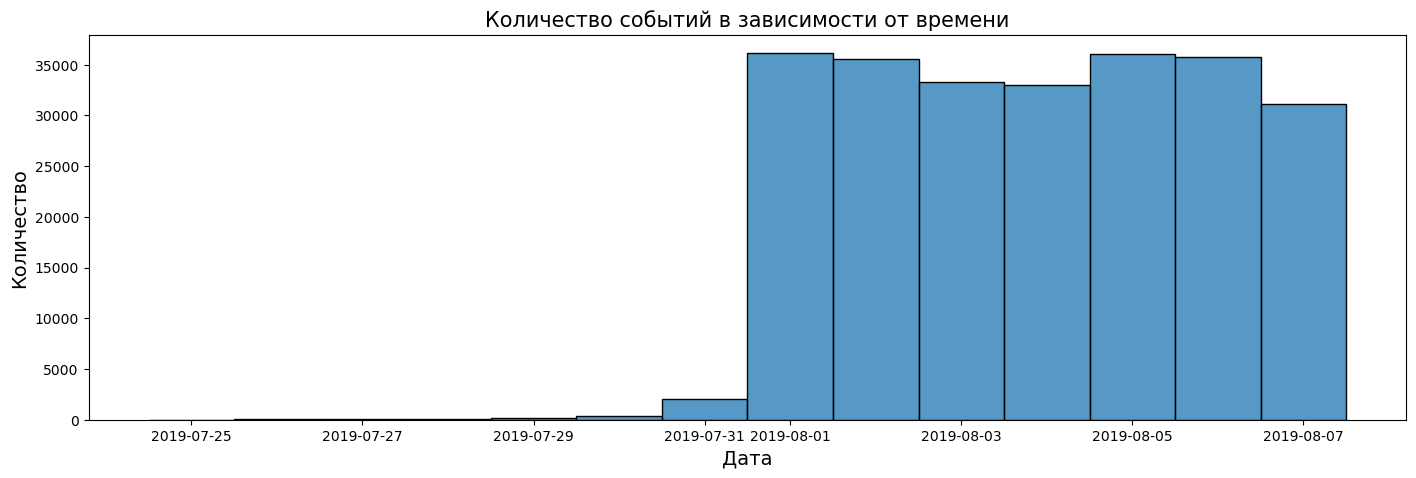

In [18]:
plt.figure(figsize=(17,5))
#plt.plot(date_count_user['date'],date_count_user['eventname'])
sns.histplot(x = 'date', data = data, bins = 10);
plt.xlabel('Дата',fontdict = {'fontsize' : 14})
plt.ylabel('Количество',fontdict = {'fontsize' : 14})
plt.title('Количество событий в зависимости от времени',fontdict = {'fontsize' : 15})


Мы не можем быть уверенным, что у вас одинаково полные данные за весь период, так как на графике значений до 2019-08-01 в несколько раз меньше чем после, откину эти данные из анализа

In [19]:
nunique_user_id_before = (data['userId'].nunique()) #количетсво уникальных пользователей до удаления
count_eventname_before = (data['eventname'].count()) #количетсво событий  до удаления
display(nunique_user_id_before)
display(count_eventname_before)

7551

243713

In [20]:
data = data[data['datetime']>='2019-08-01 0:0:0']
date_count_user = data.groupby('date',as_index = False).agg({'eventname':'count'})
date_count_user

,date,eventname
0,2019-08-01,36141
1,2019-08-02,35554
2,2019-08-03,33282
3,2019-08-04,32968
4,2019-08-05,36058
5,2019-08-06,35788
6,2019-08-07,31096


In [21]:
data['userId'].nunique() #количетсво уникальных пользователей после удаления
data['eventname'].count() #количетсво событий  после удаления

240887

In [22]:
display (data['userId'].nunique() / nunique_user_id_before * 100) #процент остатка уникальных пользователей
display (data['eventname'].count() / count_eventname_before * 100) #процент остатка событий

99.77486425638989

98.8404393692581

Мы потеярли 17 пользователей, что занимает меньше полупроцента, также незначительна потеря в событиях всего 1 процент. Такое удаление не повиляет негативно на анализ

In [23]:
data['expid'].value_counts()

expid
248    84563
246    79302
247    77022
Name: count, dtype: int64

У нас есть пользователи из всех трех жкспериментальных групп

В ходе шага 3 были изучены данные.
- Было определенно коичество событий всего
- Были отрезаны даты меньше 2019-08-01 так как мы не можем быть уверенным, что у вас одинаково полные данные за весь период, так как на графике значений до 2019-08-01 в несколько раз меньше чем после, откину эти данные их анализа
- после отброса данных мы потеряли всего 17 пользователей, что не повлияет на анализ

### Шаг 4.
Изучите воронку событий

Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [24]:
data['eventname'].value_counts()

eventname
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: count, dtype: int64

Посчитаю, сколько пользователей совершали каждое из этих событий. Отсортируйю события по числу пользователей

In [25]:
date_eventname_user = data.groupby('eventname',as_index = False).agg({'userId':'nunique'})
date_eventname_user = date_eventname_user.sort_values(by='userId',ascending=False)

Посчитайте долю пользователей, которые хоть раз совершали событие.

In [26]:
# Посчитаем долю пользователей
date_eventname_user['%'] = round(date_eventname_user['userId']/len(data['userId'].unique()), 3) * 100
date_eventname_user

,eventname,userId,%
1,MainScreenAppear,7419,98.5
2,OffersScreenAppear,4593,61.0
0,CartScreenAppear,3734,49.6
3,PaymentScreenSuccessful,3539,47.0
4,Tutorial,840,11.1


Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

- tutorial (840 пользователей дошли)
- Главный экран отображается (7419 пользователей дошли)
- На экране появилось предложение (4593 пользователей дошли)
- Экран корзины (3734 пользователей дошли)
- Платеж выполнен (3539 пользователей дошли)

Не совсем ясно в каком этапе проходит tutorial, так как он должен проходить до этапа платежа либо предложений. Но так как тут всего 840, значит это необязательное событие, не буду его включать в анализ воронок

По воронке событий посчитаю, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем)

In [27]:
date_eventname_user["eventname_lagged"] = date_eventname_user['userId'] / (date_eventname_user['userId'].shift(1)) * 100 
date_eventname_user #посчитал в процентах

,eventname,userId,%,eventname_lagged
1,MainScreenAppear,7419,98.5,NaN
2,OffersScreenAppear,4593,61.0,61.908613
0,CartScreenAppear,3734,49.6,81.297627
3,PaymentScreenSuccessful,3539,47.0,94.777718
4,Tutorial,840,11.1,23.735519


Как мы видим больше всего пользователей теряется на шаге с появлением предложений а именно 38% пользователей, который выдели главный экран

62% пользователей переходят на экран предложения, здесь теряется наиболешее количество. Возможно главная страница не удобна пользователю. Со страницы предложения доходят до корзины - 81%, а до оплаты доходят почти все из "корзины" - 95%. 48% пользователей доходит от первого события до оплаты

В ходе 4 шага мы поделили события на воронки и увидели как меняется количество пользователей от одного события к следующему

### Шаг 5. 
Изучите результаты эксперимента

In [28]:
data['expid'].value_counts() #пользователей в каждой экспериментальной группе

expid
248    84563
246    79302
247    77022
Name: count, dtype: int64

Проверю, находят ли статистические критерии разницу между выборками 246 и 247.

- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

In [29]:
#Создам датафреймы с каждой из выборок
data_246 = data[data['expid'] == 246]
data_247 = data[data['expid'] == 247]
data_248 = data[data['expid'] == 248]
data

,eventname,userId,datetime,expid,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

H0 - Доли в двух выборках  равны (доли в группах, совершившие определенное событие)

H1 - Доли в двух выборках не равны (доли в группах, совершившие определенное событие)

Использую проверку гипотезы о равенстве долей. Проведу сравнения пропорций двух генеральных совокупностей по выборкам из них. Статистический тест z_value 

In [30]:

data.columns = data.columns = ['name', 'device_id', 'datetime', 'group','date']
data['device_id'] = data['device_id'].astype(str)
data['group'] = data['group'].astype(str)
logs_pivot = data.pivot_table(index='group',values='device_id',aggfunc='nunique')
#Сделам таблицу с числом уникальных пользователей по событиям и контрольным группам
logs_voronka = data.pivot_table(index='group',columns = 'name', values='device_id',aggfunc='nunique')
del logs_voronka['Tutorial']
logs_voronka['total'] = [logs_pivot['device_id'][0],logs_pivot['device_id'][1],logs_pivot['device_id'][2]]
logs_voronka 


name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,total
group,,,,,
246,1266,2450,1542,1200,2484
247,1238,2476,1520,1158,2513
248,1230,2493,1531,1181,2537


In [31]:
alpha = 0.05  # критический уровень статистической значимости

In [32]:
# Функция для проверки гипотезы
def hypothesi_testing(success, trials,alpha):

    # пропорция успехов в первой группе:
    p1 = success[0]/trials[0]
    # пропорция успехов во второй группе:
    p2 = success[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  # ваш код



    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

In [33]:
#Функция определения группы и параметров, а возвращает результат проверки
def group(group_1,group_2,alpha):
    alpha_test = alpha
    count_total = ([logs_voronka['total'][group_1],logs_voronka['total'][group_2]])
    count_MainScreenAppear = ([logs_voronka['MainScreenAppear'][group_1],logs_voronka['MainScreenAppear'][group_2]])
    count_CartScreenAppear = ([logs_voronka['CartScreenAppear'][group_1],logs_voronka['CartScreenAppear'][group_2]])
    count_OffersScreenAppear = ([logs_voronka['OffersScreenAppear'][group_1],logs_voronka['OffersScreenAppear'][group_2]])
    count_PaymentScreenSuccessful = ([logs_voronka['PaymentScreenSuccessful'][group_1],logs_voronka['PaymentScreenSuccessful'][group_2]])
    
    print('Результаты теста по долям count_total и count_MainScreenAppear для групп')
    hypothesi_testing(count_MainScreenAppear, count_total, alpha_test)
    print('')    
    
    print('Результаты теста по долям count_OffersScreenAppear и count_total для групп')
    hypothesi_testing(count_OffersScreenAppear, count_total, alpha_test)
    print('')  
    
    print('Результаты теста по долям count_total и count_CartScreenAppear для групп')
    hypothesi_testing(count_CartScreenAppear, count_total, alpha_test)
    print('')  
    
    print('Результаты теста по долям count_PaymentScreenSuccessful и count_total для групп')
    hypothesi_testing(count_PaymentScreenSuccessful, count_total, alpha_test)
    
    

In [34]:
#группы 246 и 247
group(0,1,alpha)

Результаты теста по долям count_total и count_MainScreenAppear для групп
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_total для групп
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_total и count_CartScreenAppear для групп
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_total для групп
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


*Разницы между выборками 246 и 247 нет. Нет оснований считать доли разными*

Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [35]:
#Соединим две контрольные группы в группу 249
logs_voronka.loc['249'] = [logs_voronka['CartScreenAppear'][0]+logs_voronka['CartScreenAppear'][1] ,logs_voronka['MainScreenAppear'][0]+logs_voronka['MainScreenAppear'][1], logs_voronka['OffersScreenAppear'][0]+logs_voronka['OffersScreenAppear'][1], logs_voronka['PaymentScreenSuccessful'][0]+logs_voronka['PaymentScreenSuccessful'][1], logs_voronka['total'][0]+logs_voronka['total'][1]]
logs_voronka

name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,total
group,,,,,
246,1266,2450,1542,1200,2484
247,1238,2476,1520,1158,2513
248,1230,2493,1531,1181,2537
249,2504,4926,3062,2358,4997


In [36]:
#группы 248 и 246
group(0,2,alpha)

Результаты теста по долям count_total и count_MainScreenAppear для групп
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_total для групп
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_total и count_CartScreenAppear для групп
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_total для групп
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Разницы между выборками 248 и 246 нет. Нет оснований считать доли разными

In [37]:
#группы 248 и 247
group(1,2,alpha)

Результаты теста по долям count_total и count_MainScreenAppear для групп
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_total для групп
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_total и count_CartScreenAppear для групп
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_total для групп
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Разницы между выборками 248 и 247 нет. Нет оснований считать доли разными

In [38]:
#группы 248 и 249
group(3,2,alpha)

Результаты теста по долям count_total и count_MainScreenAppear для групп
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_total для групп
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_total и count_CartScreenAppear для групп
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_total для групп
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


*Разницы между выборками 248 и 249(объедененная контрольная группа) нет. Нет оснований считать доли разными*

Выбран уровень значимости = 0.05

Мы проводим множественный тест, т.е. берем несколько выборок из одного и того же набора данных. Его особенность в том, что с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода. В связи с этим мы можем скорректировать наши конечные p_value для сравнения их значений с alpha, НО в этом нет необходимости, т.к. ни по одному из проведенных сравнений не обнаружилось статзначимых различий. 

## *Вывод*

Манипуляции с датасетом:

- Удалили дубли - 416
- Пропуски не обнаружены
- Переименованны столбцы
- Изменены типы двнных

В процессе исследлвания было установлено:

- Уникальных пользователей - 7551
- В среднем на одного пользователя приходится 32 события
- При исследовании дат за которые есть данные, выяснилось, что до 1.08.2019 данных недостаточно, результаты эксперемента еще не доехали. Соответсвенно будем рассматривать период начиная с 01.08.2019. Все группы присутствуют в достаточном количестве. Всего потеряно - 2826 событий.

- В лог имеется 5 экранов: главная, страница, страница предложения, корзина, страница оплаты, руководство

- Самое популярное событие - показ главного экрана. Самое непопулярное - экран оплаты, руководство - не входит в воронку продаж. Возможный порядок событий:Просмотр главной страницы, Страница предложения, Корзина, Оплата. "Руководство" - видимо там описана информация о правилах заказа, оплаты, доставки и тд. У пользователей не пользуется спросом, и никак не влияет на продажи.

- 62% пользователей переходят на экран предложения со главной страницы, здесь теряется наиболешее количество. Возможно главная страница не удобна пользователю. Со страницы предложения доходят до корзины - 81%, а до оплаты доходят почти все из "корзины" - 95%. Наблюдается довольно высокий процент пользователей, которые выполняют целевое действие - 48%
- При проведении А/А теста, разницы между выборками нет. Нет оснований считать доли разными.
- При сравнении долей контрольных групп и целевой так же различий не выявлено.
- Можно сделать вывод, что текст на сайте менять не нужно. В лучшем случае конверсия не изменится. А доля перешедших к корзине пользователей может упасть.
